In [28]:
from __future__ import absolute_import, division, print_function

In [29]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [30]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [31]:
mnist.train.images.shape

(55000, 784)

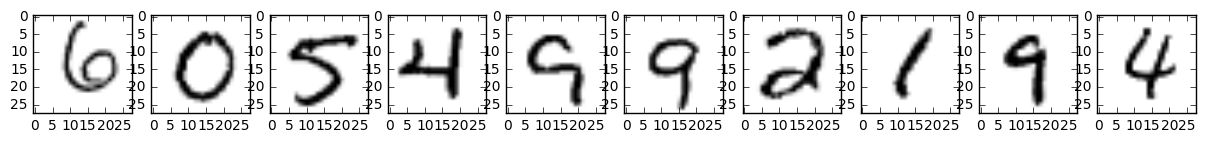

In [32]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [33]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

In [34]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))   
model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.25))   
model.add(Dense(10))
model.add(Activation('softmax'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(mnist.train.images, mnist.train.labels,
          batch_size=250, nb_epoch=10, verbose=1,
          validation_data=(mnist.test.images, mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 4s - loss: 0.3218 - acc: 0.9053 - val_loss: 0.1208 - val_acc: 0.9608
Epoch 2/10
55000/55000 [==============================] - 4s - loss: 0.1228 - acc: 0.9628 - val_loss: 0.0953 - val_acc: 0.9695
Epoch 3/10
55000/55000 [==============================] - 4s - loss: 0.0873 - acc: 0.9734 - val_loss: 0.0723 - val_acc: 0.9761
Epoch 4/10
55000/55000 [==============================] - 4s - loss: 0.0664 - acc: 0.9794 - val_loss: 0.0718 - val_acc: 0.9774
Epoch 5/10
55000/55000 [==============================] - 4s - loss: 0.0570 - acc: 0.9820 - val_loss: 0.0735 - val_acc: 0.9774
Epoch 6/10
55000/55000 [==============================] - 4s - loss: 0.0460 - acc: 0.9852 - val_loss: 0.0618 - val_acc: 0.9807
Epoch 7/10
55000/55000 [==============================] - 4s - loss: 0.0377 - acc: 0.9879 - val_loss: 0.0580 - val_acc: 0.9827
Epoch 8/10
55000/55000 [==============================] - 4s 

In [37]:
score = model.evaluate(mnist.test.images, mnist.test.labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0694880377451
Test accuracy: 0.9793


In [38]:
# test item #100 is a six
pixels = mnist.test.images[100]
result = model.predict_on_batch(np.array([pixels]))
dict(zip(range(10), result[0]))

{0: 8.9293675e-09,
 1: 9.7914683e-11,
 2: 1.0442798e-11,
 3: 4.8142077e-11,
 4: 1.0251629e-10,
 5: 8.399363e-09,
 6: 1.0,
 7: 4.9054903e-11,
 8: 1.3232786e-09,
 9: 1.9998848e-13}

In [39]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

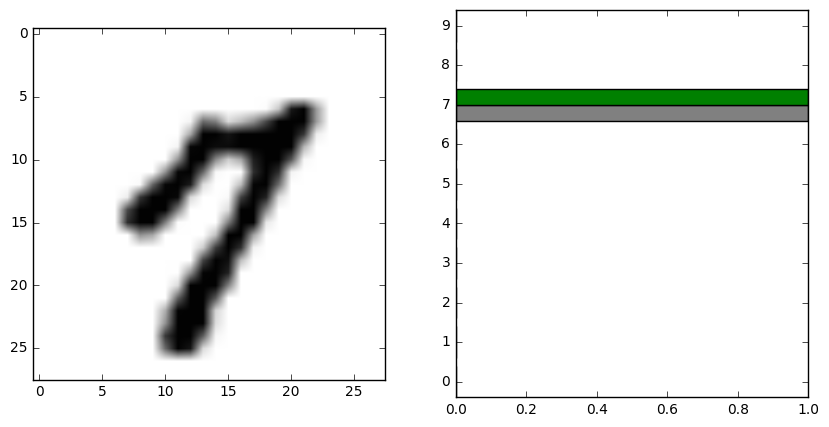

In [40]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]

test_render(pixels, result, truth)

In [41]:
### What went wrong?
pixels = mnist.test.images
result = model.predict_on_batch([pixels])
truth = mnist.test.labels

In [42]:
acc = result.argmax(axis=1) == truth.argmax(axis=1)
incorrect = np.argwhere(acc==False).flatten()

print("Incorrect predictions: {}".format(len(incorrect)))

Incorrect predictions: 207


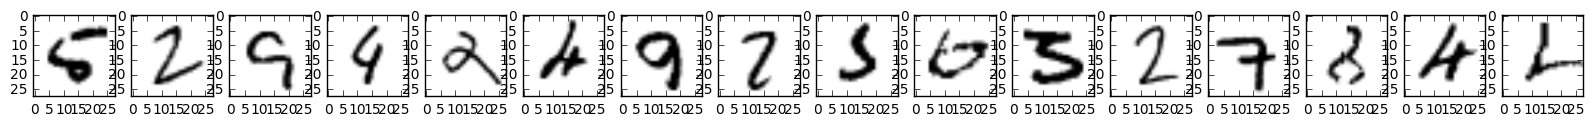

In [43]:
plt.figure(figsize=(20,5))
plt_idx = 1
for i in list(incorrect[:16]):
    plt.subplot(1, 16, plt_idx)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
    plt_idx += 1
plt.show()


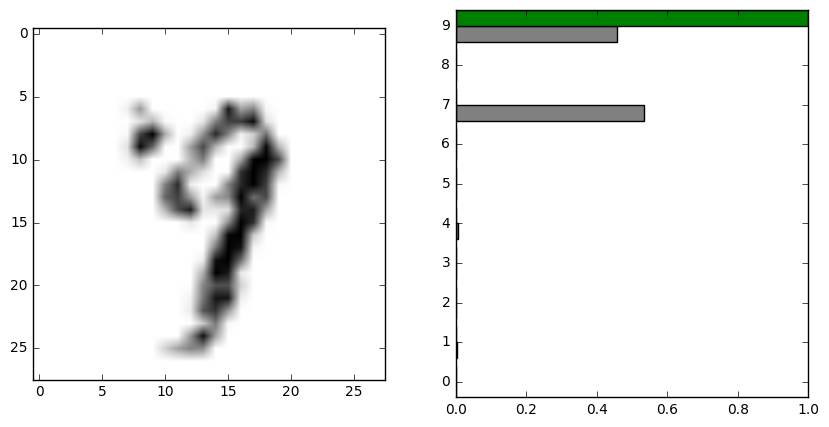

In [44]:
i = random.choice(list(incorrect))

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]

test_render(pixels, result, truth)